# Pêndulo Duplo Simples - Kane

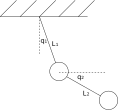

In [1]:
from IPython.core.display import SVG
SVG(filename='pendulo-duplo-simples.svg')

In [2]:
import sympy.physics.mechanics as me
import sympy as sy

In [3]:
q1,q2 = me.dynamicsymbols('q1 q2')
q1d, q2d = me.dynamicsymbols('q1 q2',1)
u1, u2 = me.dynamicsymbols('u1 u2')
u1d, u2d = me.dynamicsymbols('u1 u2', 1)

In [4]:
N = me.ReferenceFrame('N')
A = me.ReferenceFrame('A')
B = me.ReferenceFrame('B')

In [5]:
A.orient(N,'Axis',[q1,N.z])
A.set_ang_vel(N,u1*A.z)
A.dcm(N)

Matrix([
[ cos(q1(t)), sin(q1(t)), 0],
[-sin(q1(t)), cos(q1(t)), 0],
[          0,          0, 1]])

In [6]:
B.orient(A,'Axis',[q2,N.z])
B.set_ang_vel(A,u2*B.z)
B.dcm(N)

Matrix([
[-sin(q1(t))*sin(q2(t)) + cos(q1(t))*cos(q2(t)),  sin(q1(t))*cos(q2(t)) + sin(q2(t))*cos(q1(t)), 0],
[-sin(q1(t))*cos(q2(t)) - sin(q2(t))*cos(q1(t)), -sin(q1(t))*sin(q2(t)) + cos(q1(t))*cos(q2(t)), 0],
[                                             0,                                              0, 1]])

In [7]:
O = me.Point('O')
O.set_vel(N,0)

In [8]:
m1,m2,L1,L2,g = sy.symbols('m1 m2 L1 L2 g')

In [9]:
P1 = me.Point('P1')
p_P1_O = -L1*A.y
P1.set_pos(O,p_P1_O)
P1.set_vel(N,p_P1_O.dt(N))
P1.vel(N)

L1*u1*A.x

In [10]:
P1.acc(N)

L1*u1'*A.x + L1*u1**2*A.y

In [11]:
P2 = me.Point('P2')
p_P2_P1 = -L2*B.y
p_P2_O = p_P1_O + p_P2_P1
P2.set_pos(P1,p_P2_P1)
P2.set_vel(N,p_P2_O.dt(N))
P2.vel(N)

L1*u1*A.x + L2*(u1 + u2)*B.x

In [12]:
P2.acc(N)

L1*u1'*A.x + L1*u1**2*A.y + L2*(u1' + u2')*B.x + L2*(u1 + u2)**2*B.y

In [13]:
Par1 = me.Particle('Par1',P1,m1)

In [14]:
Par2 = me.Particle('Par2',P2,m2)

In [15]:
T1, T2 = sy.symbols('T1 T2')

In [16]:
R1 = -m1*g*N.y + T1*A.y - T2*B.y

In [17]:
R2 = -m2*g*N.y + T2*B.y

In [18]:
kd = [q1d-u1,q2d-u2]

In [19]:
Fl = [(P1,R1),(P2,R2)]

In [20]:
Bl = [Par1,Par2]

In [21]:
KM = me.KanesMethod(N,q_ind=[q1,q2],u_ind=[u1,u2],kd_eqs=kd)

In [22]:
KM.kanes_equations(Bl,Fl)[0]

Matrix([
[-L1*g*m1*sin(q1(t)) - L1*g*m2*sin(q1(t)) - L2*g*m2*(sin(q1(t))*cos(q2(t)) + sin(q2(t))*cos(q1(t)))],
[                                          -L2*g*m2*(sin(q1(t))*cos(q2(t)) + sin(q2(t))*cos(q1(t)))]])

In [23]:
KM.kindiffdict()

{Derivative(q1(t), t): u1(t), Derivative(q2(t), t): u2(t)}

In [24]:
KM.mass_matrix_full

Matrix([
[1, 0,                                                  0,                             0],
[0, 1,                                                  0,                             0],
[0, 0, L1**2*m1 + m2*(L1**2 + 2*L1*L2*cos(q2(t)) + L2**2), m2*(L1*L2*cos(q2(t)) + L2**2)],
[0, 0,                      m2*(L1*L2*cos(q2(t)) + L2**2),                      L2**2*m2]])

Output do código: 
$ \dot{q_{1}} $ 
$ \dot{q_{2}} $
$ \dot{u_{1}} $
$ \dot{u_{2}} $

In [25]:
KM.forcing_full

Matrix([
[                                                                                                                                                                    u1(t)],
[                                                                                                                                                                    u2(t)],
[L1*L2*m2*(u1(t) + u2(t))**2*sin(q2(t)) - L1*L2*m2*u1(t)**2*sin(q2(t)) - L1*g*m1*sin(q1(t)) - L1*g*m2*sin(q1(t)) - L2*g*m2*(sin(q1(t))*cos(q2(t)) + sin(q2(t))*cos(q1(t)))],
[                                                                                  -L1*L2*m2*u1(t)**2*sin(q2(t)) - L2*g*m2*(sin(q1(t))*cos(q2(t)) + sin(q2(t))*cos(q1(t)))]])

In [26]:
constantes = {m1:1,m2:1,L1:0.5,L2:0.5,g:9.8}

In [27]:
import numpy as np
import pydy.system as dy
import matplotlib.pyplot as plt

In [28]:
condi_ini = {q1:np.pi/2,q2:np.pi/2,u1:0,u2:0}

In [29]:
num = 1000
t0 = 0
tf = 10
t = np.linspace(t0,tf,num)

In [30]:
sistema = dy.System(KM, constants = constantes, initial_conditions = condi_ini, times = t)

In [31]:
Q = sistema.integrate()

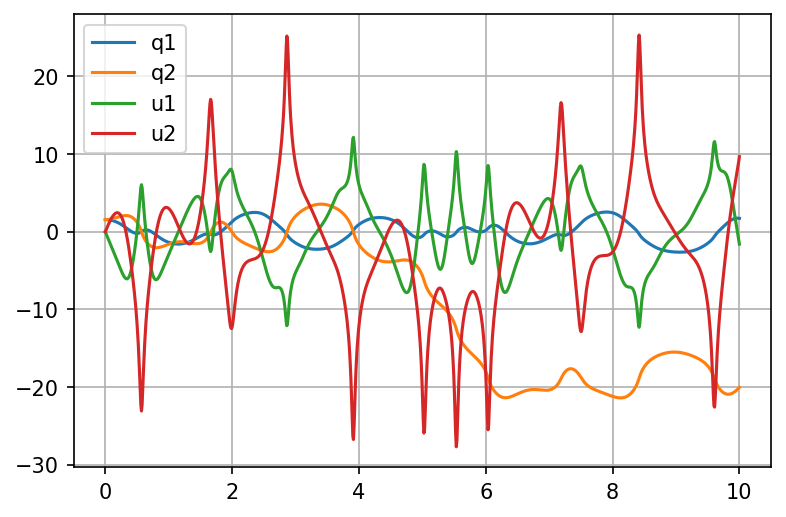

In [32]:
%matplotlib inline
plt.rcParams['figure.figsize']=(6,4)
plt.rcParams['figure.dpi']=150
plt.figure()
plt.plot(sistema.times, Q)
plt.grid(True)
plt.legend(['q1','q2','u1','u2'])


Text(0, 0.5, 'q1')

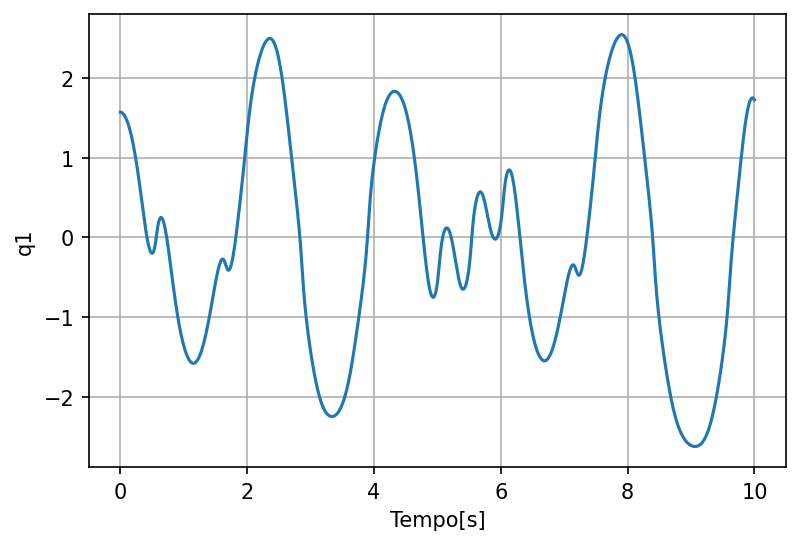

In [33]:
plt.figure()
plt.plot(sistema.times,Q[:,0])
plt.grid(True)
plt.xlabel('Tempo[s]')
plt.ylabel('q1')

Text(0, 0.5, 'q2')

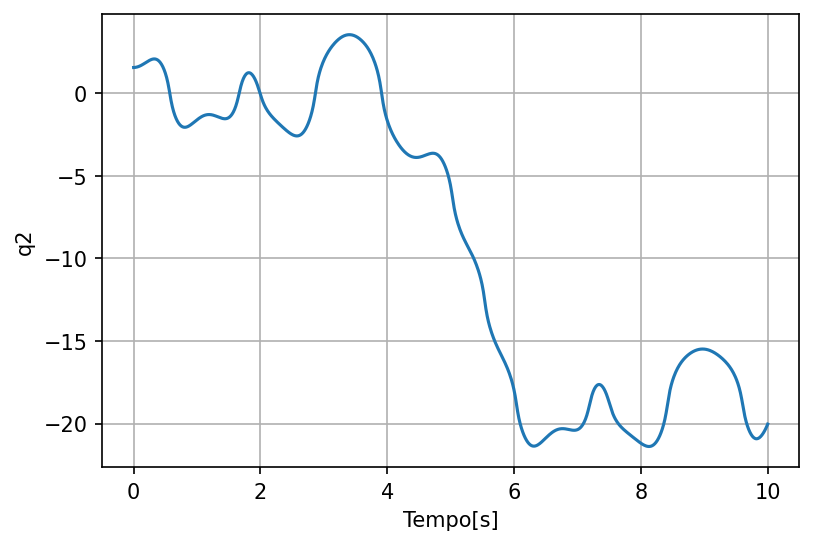

In [34]:
plt.figure()
plt.plot(sistema.times,Q[:,1])
plt.grid(True)
plt.xlabel('Tempo[s]')
plt.ylabel('q2')

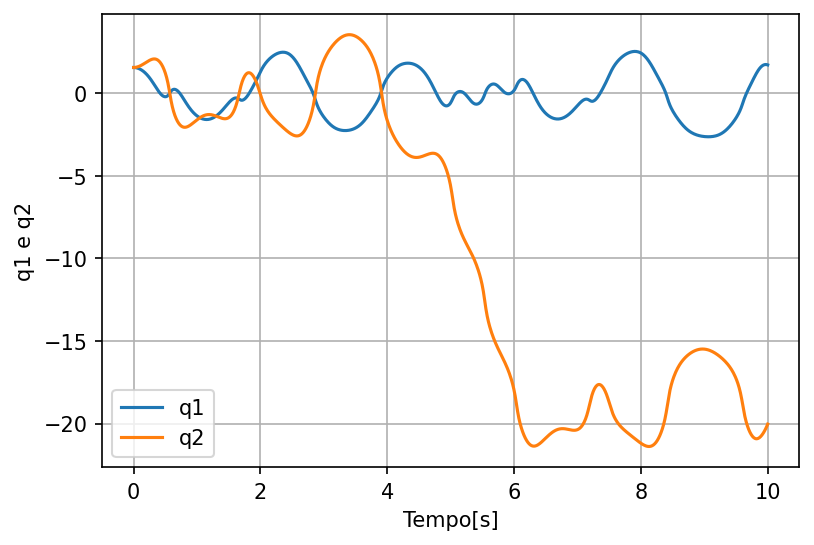

In [35]:
plt.figure()
plt.plot(sistema.times,Q[:,0:2])
plt.grid(True)
plt.xlabel('Tempo[s]')
plt.ylabel('q1 e q2')
plt.legend(['q1','q2'])

Text(0, 0.5, 'u1')

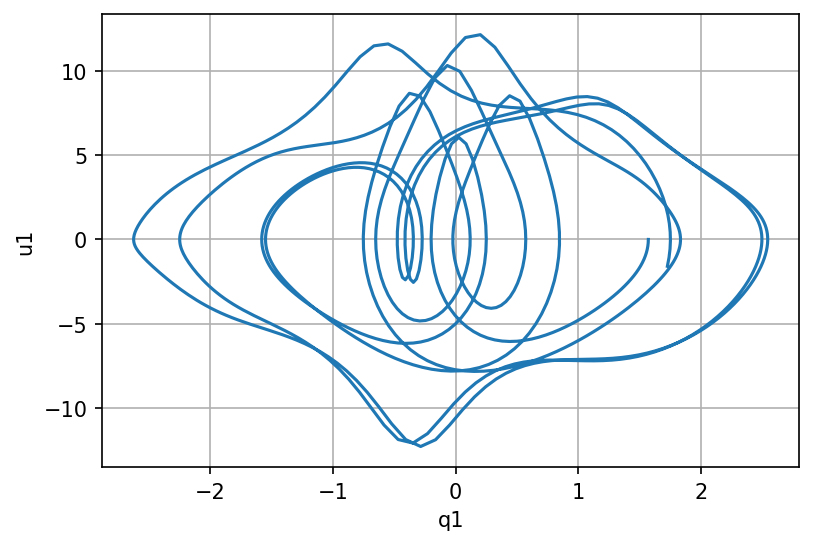

In [36]:
plt.figure()
plt.plot(Q[:,0],Q[:,2])
plt.grid(True)
plt.xlabel('q1')
plt.ylabel('u1')

Text(0, 0.5, 'u2')

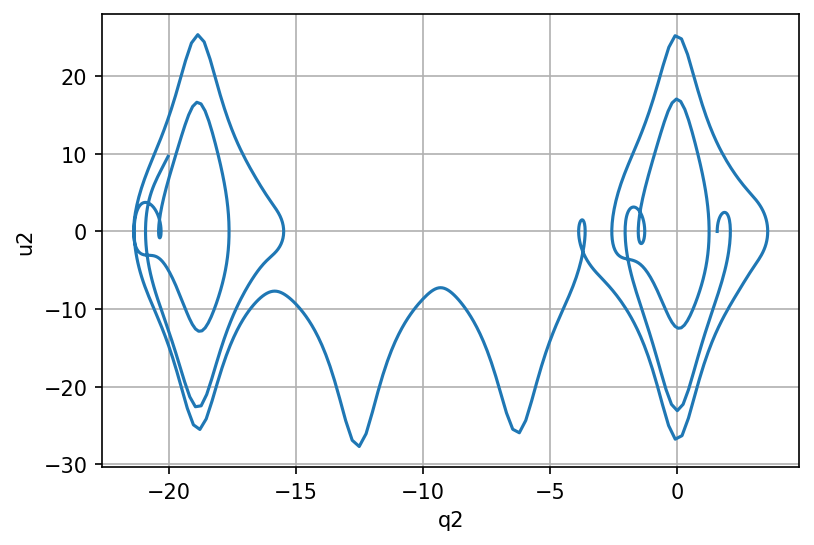

In [37]:
plt.figure()
plt.plot(Q[:,1],Q[:,3])
plt.grid(True)
plt.xlabel('q2')
plt.ylabel('u2')

In [38]:
from matplotlib import animation, rc
from IPython.display import HTML

In [39]:
x0 = 0
y0 = 0
x1 = me.dot(p_P1_O,N.x)
x1 = x1.subs(constantes)
y1 = me.dot(p_P1_O,N.y)
y1 = y1.subs(constantes)
x2 = me.dot(p_P1_O + p_P2_P1,N.x)
x2 = x2.subs(constantes)
y2 = me.dot(p_P1_O + p_P2_P1,N.y)
y2 = y2.subs(constantes)
ind = 0
qn = {q1:Q[ind,0],q2:Q[ind,1]}

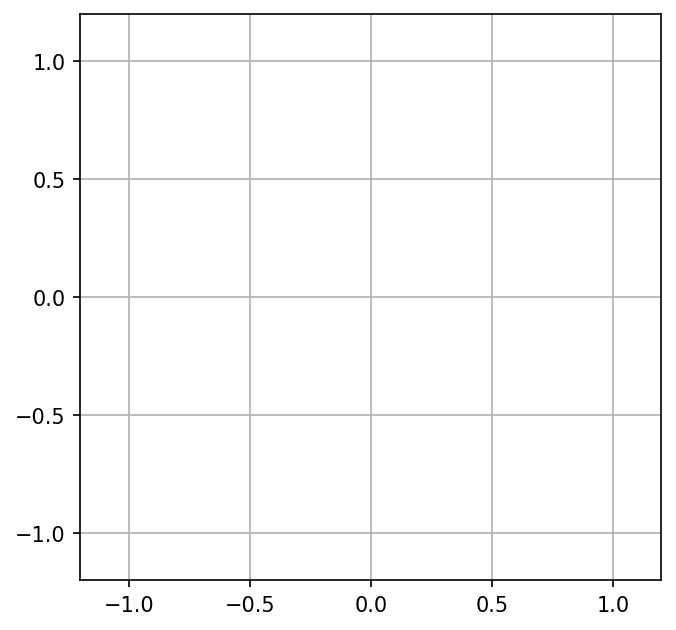

In [40]:
%matplotlib inline
plt.rcParams['figure.figsize']=(5,5)
plt.rcParams['figure.dpi']=150

fig, ax = plt.subplots()

ax.set_xlim(( -1.2, 1.2))
ax.set_ylim((-1.2, 1.2))
ax.grid(True)
line, = ax.plot([], [], 'o-')


In [41]:
def animate(i):
    qn = {q1:Q[i,0],q2:Q[i,1]}
    xp1 = x1.subs(qn)
    xp2 = x2.subs(qn)
    yp1 = y1.subs(qn)
    yp2 = y2.subs(qn)
    line.set_data([x0,xp1,xp2],[y0,yp1,yp2])
    return (line,)

In [42]:
def init():
    line.set_data([], [])
    return (line,)

In [43]:
anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=1000, interval=20, blit=True)

In [44]:
HTML(anim.to_html5_video())